In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [4]:
dataset = pd.read_csv(r"/content/drive/MyDrive/Hackthon Dataset/train_fashion.csv")

In [5]:
dataset.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date,Order_Repeat_Chance
0,98981,2016-09-10,2016-09-11,897,l,grey,33,19.9,48040,Mrs,1960-05-30,Hamburg,2015-02-17,0
1,69825,2016-08-15,2016-08-20,1557,xl,petrol,31,89.9,42892,Mrs,1958-09-23,Lower Saxony,2015-11-14,1
2,9929,2016-06-27,2016-07-02,292,4+,grey,4,64.9,32479,Mrs,1961-09-19,Hesse,2016-06-28,0
3,75600,2016-08-21,2016-08-22,1445,xxl,grey,29,59.9,4216,Mrs,1952-10-01,Lower Saxony,2015-02-17,0
4,95622,2016-09-06,2016-09-07,1415,m,mahagoni,3,21.9,39571,Mrs,1963-10-30,North Rhine-Westphalia,2015-10-02,0


In [6]:
dataset.shape

(75000, 14)

In [7]:
dataset.describe()

,Order_Ref_Number,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Order_Repeat_Chance
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,50002.922613,924.275213,30.173093,65.232934,27164.660547,0.459933
std,28883.591717,702.739285,28.190524,48.291431,14043.973668,0.498395
min,1.000000,1.000000,1.000000,0.000000,9.000000,0.000000
25%,24976.750000,214.000000,5.000000,29.900000,14943.000000,0.000000
50%,50042.500000,812.000000,25.000000,49.900000,31185.000000,0.000000
75%,75038.250000,1582.000000,44.000000,79.900000,38924.000000,1.000000
max,99999.000000,2241.000000,138.000000,999.000000,48241.000000,1.000000


In [8]:
dataset.Order_Repeat_Chance.value_counts()

0    40505
1    34495
Name: Order_Repeat_Chance, dtype: int64

In [9]:
dataset.isnull().sum()

Order_Ref_Number                 0
Order_Placed_AT                  0
Order_Delivered_Date          7021
Product_Ref_ID                   0
Size                             0
Color_Code                       0
Product_Category_Reference       0
Cost_to_Customer(USD)            0
Customer_ID                      0
Gender                           0
Customer_BirthDate            6555
Customer_Location                0
Customer_Joining_Date            0
Order_Repeat_Chance              0
dtype: int64

In [10]:
dataset = dataset.replace('?' , np.nan)

In [11]:
dataset1 = dataset.copy()

In [12]:
#dataset.dropna(inplace=True)

In [13]:
dataset = dataset.drop(["Order_Ref_Number","Customer_ID"],axis=1)

In [14]:
dataset.shape

(75000, 12)

In [15]:
dataset.Order_Placed_AT = pd.to_datetime(dataset.Order_Placed_AT)

dataset['order_placed_day'] = dataset['Order_Placed_AT'].dt.day
dataset['order_placed_month'] = dataset['Order_Placed_AT'].dt.month
dataset['order_placed_year'] = dataset['Order_Placed_AT'].dt.year

In [16]:
dataset.Order_Delivered_Date = pd.to_datetime(dataset.Order_Delivered_Date)

dataset['order_delivered_day'] = dataset['Order_Delivered_Date'].dt.day
dataset['order_delivered_month'] = dataset['Order_Delivered_Date'].dt.month
dataset['order_delivered_year'] = dataset['Order_Delivered_Date'].dt.year

In [17]:
dataset.Customer_Joining_Date = pd.to_datetime(dataset.Customer_Joining_Date)

dataset['customer_j_day'] = dataset['Customer_Joining_Date'].dt.day
dataset['customer_j_month'] = dataset['Customer_Joining_Date'].dt.month
dataset['customer_j_year'] = dataset['Customer_Joining_Date'].dt.year

In [18]:
dataset.Customer_BirthDate = pd.to_datetime(dataset.Customer_BirthDate)

dataset['customer_B_day'] = dataset['Customer_BirthDate'].dt.day
dataset['customer_B_month'] = dataset['Customer_BirthDate'].dt.month
dataset['customer_B_year'] = dataset['Customer_BirthDate'].dt.year

In [19]:
dataset.head()

,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date,Order_Repeat_Chance,order_placed_day,order_placed_month,order_placed_year,order_delivered_day,order_delivered_month,order_delivered_year,customer_j_day,customer_j_month,customer_j_year,customer_B_day,customer_B_month,customer_B_year
0,2016-09-10,2016-09-11,897,l,grey,33,19.9,Mrs,1960-05-30,Hamburg,2015-02-17,0,10,9,2016,11.0,9.0,2016.0,17,2,2015,30.0,5.0,1960.0
1,2016-08-15,2016-08-20,1557,xl,petrol,31,89.9,Mrs,1958-09-23,Lower Saxony,2015-11-14,1,15,8,2016,20.0,8.0,2016.0,14,11,2015,23.0,9.0,1958.0
2,2016-06-27,2016-07-02,292,4+,grey,4,64.9,Mrs,1961-09-19,Hesse,2016-06-28,0,27,6,2016,2.0,7.0,2016.0,28,6,2016,19.0,9.0,1961.0
3,2016-08-21,2016-08-22,1445,xxl,grey,29,59.9,Mrs,1952-10-01,Lower Saxony,2015-02-17,0,21,8,2016,22.0,8.0,2016.0,17,2,2015,1.0,10.0,1952.0
4,2016-09-06,2016-09-07,1415,m,mahagoni,3,21.9,Mrs,1963-10-30,North Rhine-Westphalia,2015-10-02,0,6,9,2016,7.0,9.0,2016.0,2,10,2015,30.0,10.0,1963.0


In [20]:
dataset = dataset.drop(["Order_Placed_AT","Order_Delivered_Date","Customer_BirthDate","Customer_Joining_Date"],axis=1)

In [21]:
dataset.isnull().sum()

Product_Ref_ID                   0
Size                             0
Color_Code                      48
Product_Category_Reference       0
Cost_to_Customer(USD)            0
Gender                           0
Customer_Location                0
Order_Repeat_Chance              0
order_placed_day                 0
order_placed_month               0
order_placed_year                0
order_delivered_day           7021
order_delivered_month         7021
order_delivered_year          7021
customer_j_day                   0
customer_j_month                 0
customer_j_year                  0
customer_B_day                6555
customer_B_month              6555
customer_B_year               6555
dtype: int64

In [22]:
dataset.Color_Code = dataset.Color_Code.fillna("black")

In [23]:
dataset.order_delivered_day = dataset.order_delivered_day.fillna(dataset.order_delivered_day.median())
dataset.order_delivered_month = dataset.order_delivered_month.fillna(dataset.order_delivered_month.median())
dataset.order_delivered_year = dataset.order_delivered_year.fillna(dataset.order_delivered_year.median())

In [24]:
dataset.customer_B_day = dataset.customer_B_day.fillna(dataset.customer_B_day.median())
dataset.customer_B_month = dataset.customer_B_month.fillna(dataset.customer_B_month.median())
dataset.customer_B_year = dataset.customer_B_year.fillna(dataset.customer_B_year.median())

##Change The column Levels For Gender

In [25]:
dataset.Gender=dataset.Gender.replace('Family','Mrs')
dataset.Gender = dataset.Gender.replace('Company','Mr')
dataset.Gender = dataset.Gender.replace('not reported','Mr')

In [26]:
# index = dataset[(dataset['Gender']== "not reported")].index
# dataset.drop(index, inplace=True)

## Change The Columns level for Size 

In [27]:
dataset.Size = dataset.Size.str.replace("+","")

In [28]:
dataset.Size = dataset.Size.replace({"xs":38})
dataset.Size = dataset.Size.replace({"s":39})
dataset.Size = dataset.Size.replace({"m":41})
dataset.Size = dataset.Size.replace({"l":42})
dataset.Size = dataset.Size.replace({"xl":44})
dataset.Size = dataset.Size.replace({"xxl":46})
dataset.Size = dataset.Size.replace({"xxxl":48})
dataset.Size = dataset.Size.replace({"unsized":42})

In [29]:
dataset.Size = dataset.Size.astype("int")

In [30]:
dataset.describe()

,Product_Ref_ID,Size,Product_Category_Reference,Cost_to_Customer(USD),Order_Repeat_Chance,order_placed_day,order_placed_month,order_placed_year,order_delivered_day,order_delivered_month,order_delivered_year,customer_j_day,customer_j_month,customer_j_year,customer_B_day,customer_B_month,customer_B_year
count,75000.000000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.0,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,924.275213,43.41912,30.173093,65.232934,0.459933,15.911907,7.434173,2016.0,15.432453,7.811587,2015.765347,16.332613,4.762680,2015.472187,15.845307,6.587013,1963.840813
std,702.739285,105.80735,28.190524,48.291431,0.498395,10.084099,0.939957,0.0,9.158815,1.026045,2.260019,7.467216,2.956506,0.499229,8.352586,3.375752,10.892247
min,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,6.000000,2016.0,1.000000,1.000000,1994.000000,1.000000,1.000000,2015.000000,1.000000,1.000000,1900.000000
25%,214.000000,39.00000,5.000000,29.900000,0.000000,6.000000,7.000000,2016.0,7.000000,7.000000,2016.000000,12.000000,2.000000,2015.000000,9.000000,4.000000,1959.000000
50%,812.000000,41.00000,25.000000,49.900000,0.000000,15.000000,8.000000,2016.0,15.000000,8.000000,2016.000000,17.000000,4.000000,2015.000000,16.000000,7.000000,1965.000000
75%,1582.000000,44.00000,44.000000,79.900000,1.000000,27.000000,8.000000,2016.0,24.000000,8.000000,2016.000000,20.000000,7.000000,2016.000000,22.000000,9.000000,1969.000000
max,2241.000000,4034.00000,138.000000,999.000000,1.000000,31.000000,9.000000,2016.0,31.000000,12.000000,2017.000000,31.000000,12.000000,2016.000000,31.000000,12.000000,2011.000000


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Product_Ref_ID              75000 non-null  int64  
 1   Size                        75000 non-null  int64  
 2   Color_Code                  75000 non-null  object 
 3   Product_Category_Reference  75000 non-null  int64  
 4   Cost_to_Customer(USD)       75000 non-null  float64
 5   Gender                      75000 non-null  object 
 6   Customer_Location           75000 non-null  object 
 7   Order_Repeat_Chance         75000 non-null  int64  
 8   order_placed_day            75000 non-null  int64  
 9   order_placed_month          75000 non-null  int64  
 10  order_placed_year           75000 non-null  int64  
 11  order_delivered_day         75000 non-null  float64
 12  order_delivered_month       75000 non-null  float64
 13  order_delivered_year        750

In [32]:
dataset.order_delivered_year=dataset.order_delivered_year.replace(1994,2016)
dataset.order_delivered_year=dataset.order_delivered_year.replace(2017,2016)

In [33]:
dataset.order_delivered_day = dataset.order_delivered_day.astype('int')
dataset.order_delivered_month = dataset.order_delivered_month.astype('int')
dataset.order_delivered_year = dataset.order_delivered_year.astype('int')

dataset.customer_B_day = dataset.customer_B_day.astype('int')
dataset.customer_B_month = dataset.customer_B_month.astype('int')
dataset.customer_B_year = dataset.customer_B_year.astype('int')

## Lets Understand the Data 

In [34]:
# Normalize can be set to True to print proportions instead of number 
dataset["Order_Repeat_Chance"].value_counts(normalize=True)*100

0    54.006667
1    45.993333
Name: Order_Repeat_Chance, dtype: float64

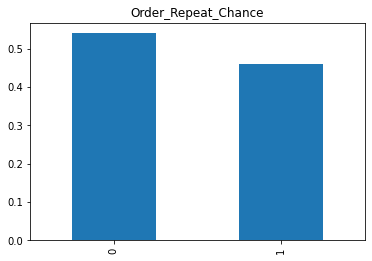

In [35]:
dataset["Order_Repeat_Chance"].value_counts(normalize=True).plot.bar(title = 'Order_Repeat_Chance')


##Independent Variable (Categorical)

In [36]:
dataset['Size'].value_counts(normalize = True)*100

42      22.574667
41      15.189333
44      13.162667
39      10.682667
46      10.314667
          ...    
4034     0.001333
80       0.001333
105      0.001333
3834     0.001333
3132     0.001333
Name: Size, Length: 70, dtype: float64

In [37]:
dataset['Color_Code'].value_counts(normalize=True)*100

black          18.804000
blue           10.661333
brown           8.724000
grey            8.697333
red             7.248000
                 ...    
copper coin     0.006667
creme           0.004000
opal            0.002667
avocado         0.002667
amethyst        0.002667
Name: Color_Code, Length: 76, dtype: float64

In [38]:
dataset["Gender"].value_counts(normalize=True)*100

Mrs    95.894667
Mr      4.105333
Name: Gender, dtype: float64

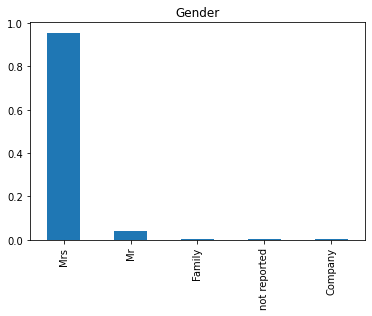

In [39]:
dataset1["Gender"].value_counts(normalize=True).plot.bar(title= "Gender")

## Check the Data Distribution for Numeric Values

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


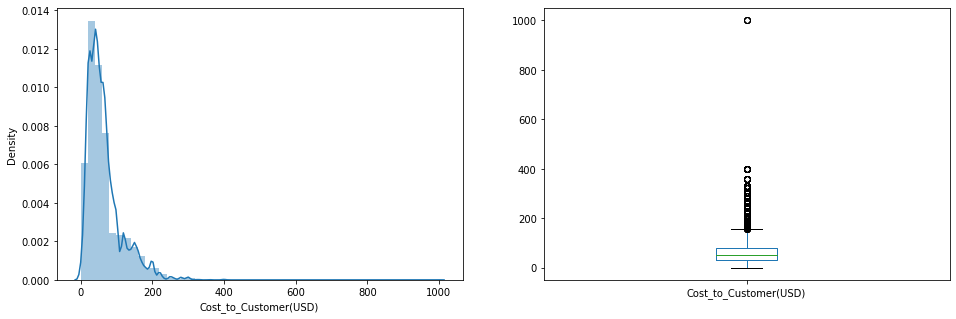

In [40]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset["Cost_to_Customer(USD)"]);

plt.subplot(122)
dataset["Cost_to_Customer(USD)"].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


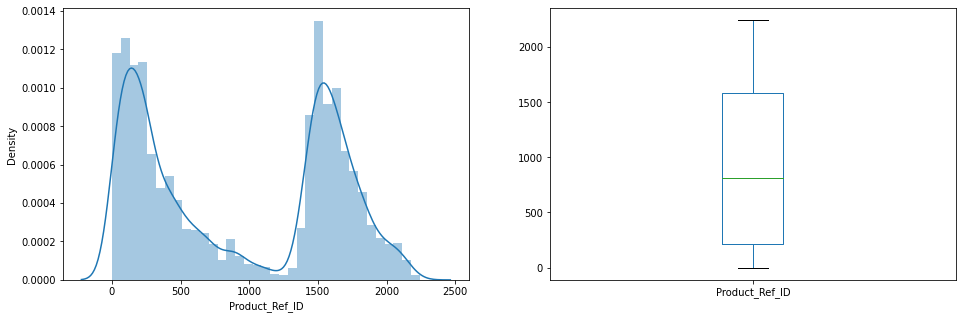

In [41]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['Product_Ref_ID']);

plt.subplot(122)
dataset['Product_Ref_ID'].plot.box(figsize=(16,5))

plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


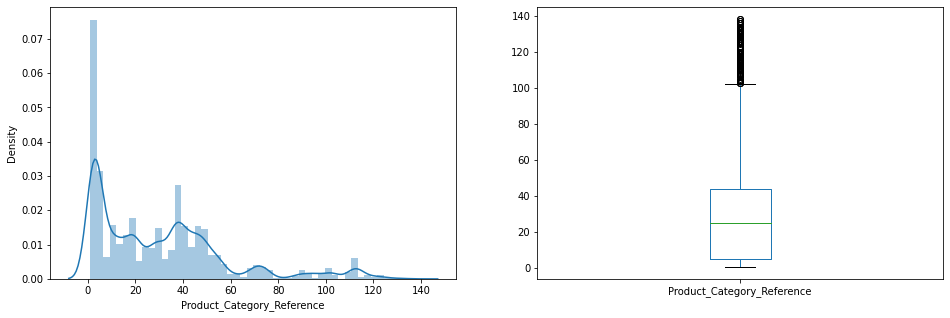

In [42]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['Product_Category_Reference']);

plt.subplot(122)
dataset['Product_Category_Reference'].plot.box(figsize=(16,5))

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


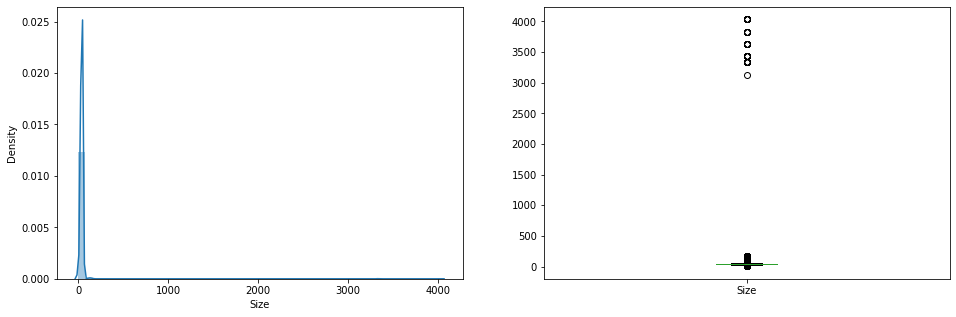

In [43]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['Size']);

plt.subplot(122)
dataset['Size'].plot.box(figsize=(16,5))

plt.show()

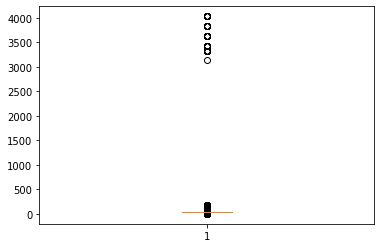

In [44]:
plt.boxplot(dataset["Size"])
plt.show()

## Treat With Skewness

In [45]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


numeric_feats = dataset.dtypes[dataset.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = dataset[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats}) 
skewness.head(12)


Skew in numerical features: 



,Skew
Size,33.224
Cost_to_Customer(USD),2.064
Product_Category_Reference,1.250
order_delivered_month,0.932
customer_j_month,0.529
Order_Repeat_Chance,0.161
order_delivered_day,0.141
customer_j_year,0.111
Product_Ref_ID,0.076
order_placed_day,0.012


In [46]:
dataset2 = dataset.copy()

## Remove Outliers

For Size Column

In [47]:
print(dataset['Size'].quantile(0.10))
print(dataset['Size'].quantile(0.90))

37.0
46.0


In [48]:
dataset["Size"] = np.where(dataset["Size"] <37.0, 37.0,dataset['Size'])
dataset["Size"] = np.where(dataset["Size"] >46.0, 46.0,dataset['Size'])

For Cost column

In [49]:
print(dataset['Cost_to_Customer(USD)'].quantile(0.10))
print(dataset['Cost_to_Customer(USD)'].quantile(0.90))

19.9
134.9


In [50]:
dataset["Cost_to_Customer(USD)"] = np.where(dataset["Cost_to_Customer(USD)"] < 19.9, 19.9,dataset['Cost_to_Customer(USD)'])
dataset["Cost_to_Customer(USD)"] = np.where(dataset["Cost_to_Customer(USD)"] > 134.9, 134.9,dataset['Cost_to_Customer(USD)'])

##For Product_Category_Reference column

In [51]:
print(dataset['Product_Category_Reference'].quantile(0.10))
print(dataset['Product_Category_Reference'].quantile(0.90))

3.0
69.0


In [52]:
dataset["Product_Category_Reference"] = np.where(dataset["Product_Category_Reference"] < 3.0, 3.0,dataset['Product_Category_Reference'])
dataset["Product_Category_Reference"] = np.where(dataset["Product_Category_Reference"] > 69.0, 69.0,dataset['Product_Category_Reference'])

In [53]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
# dataset["Size"] = np.cbrt(dataset["Size"])
# dataset["Size"] = np.sqrt(dataset["Size"])
# dataset["Size"] = np.sqrt(dataset["Size"])


In [54]:
#dataset["Cost_to_Customer(USD)"] = np.sqrt(dataset["Cost_to_Customer(USD)"])

In [55]:
#dataset["Product_Category_Reference"] = np.sqrt(dataset["Product_Category_Reference"])

## Check the Relation With Target VAriable

Order_Repeat_Chance      0      1
Gender                           
Mr                    1769   1310
Mrs                  38736  33185


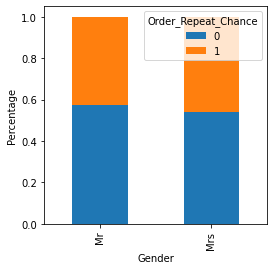

In [56]:
print(pd.crosstab(dataset["Gender"],dataset["Order_Repeat_Chance"]))
Gender = pd.crosstab(dataset["Gender"],dataset["Order_Repeat_Chance"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Order_Repeat_Chance     0     1
Size                           
37.000               4208  3803
38.000               2344  2006
39.000               4201  3811
40.000               2939  2983
41.000               6002  5390
42.000               9720  7211
43.000                584   554
44.000               5338  4534
45.000                110    53
46.000               5059  4150


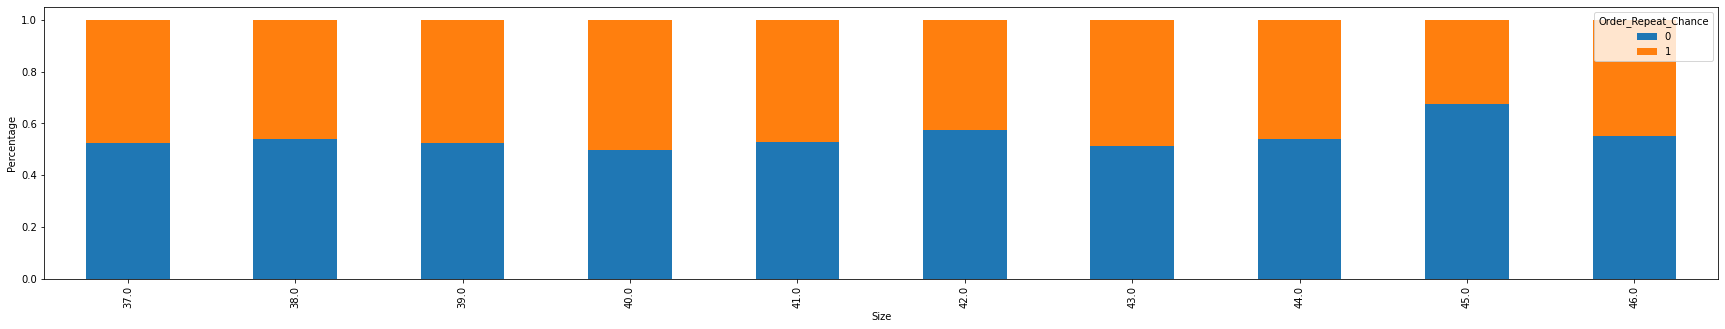

In [57]:
print(pd.crosstab(dataset["Size"],dataset["Order_Repeat_Chance"]))
Gender = pd.crosstab(dataset["Size"],dataset["Order_Repeat_Chance"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(30,5))
plt.xlabel("Size")
plt.ylabel("Percentage")
plt.show()

Order_Repeat_Chance     0     1
Color_Code                     
almond                  8     2
amethyst                2     0
ancient                79    56
anthracite           1081   984
antique pink            5     5
...                   ...   ...
striped                51    56
terracotta              3     4
turquoise             399   313
white                1376  1021
yellow                170    86

[76 rows x 2 columns]


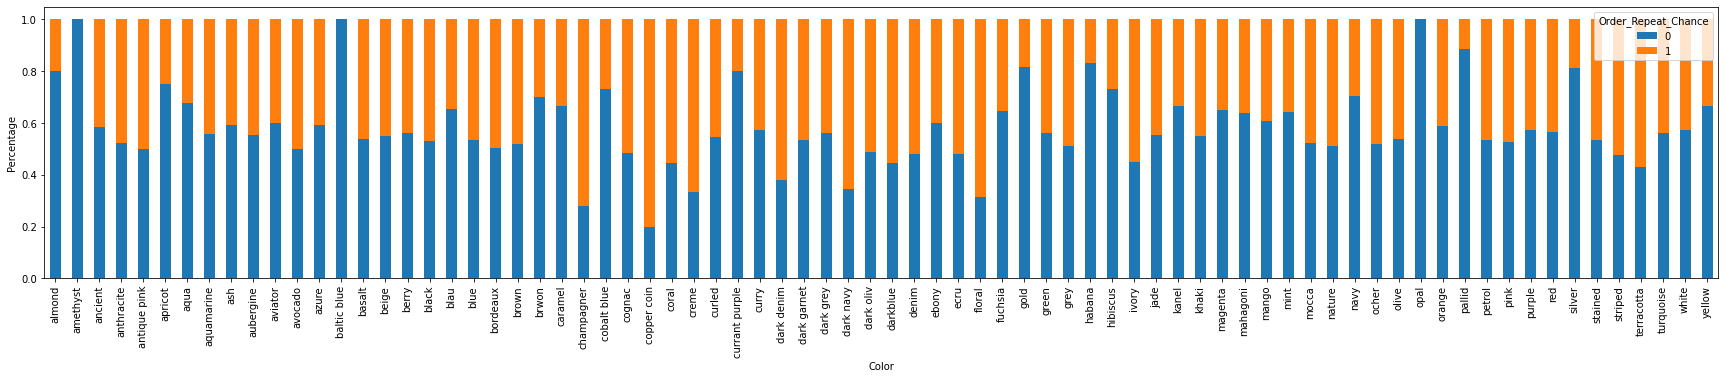

In [58]:
print(pd.crosstab(dataset["Color_Code"],dataset["Order_Repeat_Chance"]))
Gender = pd.crosstab(dataset["Color_Code"],dataset["Order_Repeat_Chance"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(30,5))
plt.xlabel("Color")
plt.ylabel("Percentage")
plt.show()

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [60]:
dataset[dataset.select_dtypes(include=['object']).columns]=dataset[dataset.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [61]:
dataset.head()

,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Gender,Customer_Location,Order_Repeat_Chance,order_placed_day,order_placed_month,order_placed_year,order_delivered_day,order_delivered_month,order_delivered_year,customer_j_day,customer_j_month,customer_j_year,customer_B_day,customer_B_month,customer_B_year
0,897,42.000,46,33.000,19.900,1,5,0,10,9,2016,11,9,2016,17,2,2015,30,5,1960
1,1557,44.000,65,31.000,89.900,1,7,1,15,8,2016,20,8,2016,14,11,2015,23,9,1958
2,292,37.000,46,4.000,64.900,1,6,0,27,6,2016,2,7,2016,28,6,2016,19,9,1961
3,1445,46.000,46,29.000,59.900,1,7,0,21,8,2016,22,8,2016,17,2,2015,1,10,1952
4,1415,41.000,54,3.000,21.900,1,9,0,6,9,2016,7,9,2016,2,10,2015,30,10,1963


In [424]:
X = dataset.drop(['Product_Ref_ID','Order_Repeat_Chance'],axis=1)
X

,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Gender,Customer_Location,order_placed_day,order_placed_month,order_placed_year,order_delivered_day,order_delivered_month,order_delivered_year,customer_j_day,customer_j_month,customer_j_year,customer_B_day,customer_B_month,customer_B_year
0,42.000,46,33.000,19.900,1,5,10,9,2016,11,9,2016,17,2,2015,30,5,1960
1,44.000,65,31.000,89.900,1,7,15,8,2016,20,8,2016,14,11,2015,23,9,1958
2,37.000,46,4.000,64.900,1,6,27,6,2016,2,7,2016,28,6,2016,19,9,1961
3,46.000,46,29.000,59.900,1,7,21,8,2016,22,8,2016,17,2,2015,1,10,1952
4,41.000,54,3.000,21.900,1,9,6,9,2016,7,9,2016,2,10,2015,30,10,1963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,39.000,63,28.000,59.900,1,7,27,6,2016,28,6,2016,17,2,2015,30,3,1965
74996,37.000,17,64.000,90.000,1,1,5,8,2016,8,8,2016,27,10,2015,16,6,1988
74997,46.000,21,3.000,134.900,1,9,21,8,2016,23,8,2016,26,2,2016,6,9,1965
74998,42.000,53,3.000,119.900,1,6,24,6,2016,27,6,2016,25,6,2016,11,7,1970


In [425]:
X.shape

(75000, 18)

In [426]:
y = dataset.loc[: , "Order_Repeat_Chance"]
y

0        0
1        1
2        0
3        0
4        0
        ..
74995    1
74996    1
74997    1
74998    1
74999    0
Name: Order_Repeat_Chance, Length: 75000, dtype: int64

In [427]:
from sklearn.model_selection import train_test_split

In [429]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = .2 ,random_state = 30)

## Logistics Regression

In [430]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [431]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 18)
(15000, 18)
(60000,)
(15000,)


In [432]:
model = lg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [433]:
pred = lg.predict(X_test)

In [434]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [435]:
tab = confusion_matrix(pred,y_test)
print("Confusion Matrix:\n",tab)
# evaluate predictions
acc = (accuracy_score(y_test, pred))*100
print("\nAccuracy: %.2f%%\n" % acc)
print(classification_report(y_test,pred))

Confusion Matrix:
 [[6292 4692]
 [1736 2280]]

Accuracy: 57.15%

              precision    recall  f1-score   support

           0       0.57      0.78      0.66      8028
           1       0.57      0.33      0.41      6972

    accuracy                           0.57     15000
   macro avg       0.57      0.56      0.54     15000
weighted avg       0.57      0.57      0.55     15000



##Random Forest Regressor

In [436]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [437]:
model2 = rf.fit(X_train,y_train)

In [438]:
pred2 = model2.predict(X_test)

In [439]:
tab2 = confusion_matrix(pred2,y_test)
print("Confusion matrix:\n",tab2)
# Evaluate Predictions
acc2 = (accuracy_score(y_test,pred2))*100
print("\nAccuracy: %.2f%%\n" % acc2)
print(classification_report(y_test,pred2))

Confusion matrix:
 [[5360 2554]
 [2668 4418]]

Accuracy: 65.19%

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      8028
           1       0.62      0.63      0.63      6972

    accuracy                           0.65     15000
   macro avg       0.65      0.65      0.65     15000
weighted avg       0.65      0.65      0.65     15000




##Random Forest Regressor

In [440]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 500,
 min_samples_split = 100,
 min_samples_leaf = 5,
 max_features = 'auto',
 max_depth = 30)

In [441]:
# bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features=6, max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False

# n_estimators= 300,
#  min_samples_split = 100,
#  min_samples_leaf = 5,
#  max_features = 'auto',
#  max_depth = 15

In [442]:

model2 = rf.fit(X_train,y_train)

In [443]:
pred2 = model2.predict(X_test)

In [444]:
tab2 = confusion_matrix(pred2,y_test)
print("Confusion matrix:\n",tab2)
# Evaluate Predictions
acc2 = (accuracy_score(y_test,pred2))*100
print("\nAccuracy: %.2f%%\n" % acc2)
print(classification_report(y_test,pred2))

Confusion matrix:
 [[5038 2351]
 [2990 4621]]

Accuracy: 64.39%

              precision    recall  f1-score   support

           0       0.68      0.63      0.65      8028
           1       0.61      0.66      0.63      6972

    accuracy                           0.64     15000
   macro avg       0.64      0.65      0.64     15000
weighted avg       0.65      0.64      0.64     15000



## Ada Boosting

In [445]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

In [446]:
# lets fit the model
model3 = abc.fit(X_train,y_train)
print("Model3 Fitted Successfully")

Model3 Fitted Successfully


In [447]:
pred3 = model3.predict(X_test)

In [448]:
tab3 = confusion_matrix(pred3,y_test)
print("Confusion matrix:\n",tab3)
# Evaluate Predictions
acc3 = (accuracy_score(y_test,pred3))*100
print("\nAccuracy: %.2f%%\n" % acc3)
print(classification_report(y_test,pred3))

Confusion matrix:
 [[4893 2581]
 [3135 4391]]

Accuracy: 61.89%

              precision    recall  f1-score   support

           0       0.65      0.61      0.63      8028
           1       0.58      0.63      0.61      6972

    accuracy                           0.62     15000
   macro avg       0.62      0.62      0.62     15000
weighted avg       0.62      0.62      0.62     15000



## Model ON XGBoosting

In [449]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [450]:
model4 = xgb.fit(X_train,y_train)

In [451]:
pred4 = model4.predict(X_test)

In [452]:
tab4 = confusion_matrix(pred4,y_test)
print("Confusion matrix:\n",tab4)
# Evaluate Predictions
acc4 = (accuracy_score(y_test,pred4))*100
print("\nAccuracy: %.2f%%\n" % acc4)
print(classification_report(y_test,pred4))

Confusion matrix:
 [[5346 2430]
 [2682 4542]]

Accuracy: 65.92%

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      8028
           1       0.63      0.65      0.64      6972

    accuracy                           0.66     15000
   macro avg       0.66      0.66      0.66     15000
weighted avg       0.66      0.66      0.66     15000



## Model On Decision Tree

In [453]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 15)

In [454]:
model5 = dtree.fit(X_train,y_train)

In [455]:
pred5 = model5.predict(X_test)

In [456]:
tab5 = confusion_matrix(pred5,y_test)
print("Confusion matrix:\n",tab5)
# Evaluate Predictions
acc5 = (accuracy_score(y_test,pred5))*100
print("\nAccuracy: %.2f%%\n" % acc5)
print(classification_report(y_test,pred5))

Confusion matrix:
 [[4693 2492]
 [3335 4480]]

Accuracy: 61.15%

              precision    recall  f1-score   support

           0       0.65      0.58      0.62      8028
           1       0.57      0.64      0.61      6972

    accuracy                           0.61     15000
   macro avg       0.61      0.61      0.61     15000
weighted avg       0.62      0.61      0.61     15000



## Model on Gradient Boosting

In [457]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10)

In [458]:
model6 = gbc.fit(X_train,y_train)

In [459]:
pred6 = model6.predict(X_test)

In [460]:
tab6 = confusion_matrix(pred6,y_test)
print("Confusion matrix:\n",tab6)
# Evaluate Predictions
acc6 = (accuracy_score(y_test,pred6))*100
print("\nAccuracy: %.2f%%\n" % acc6)
print(classification_report(y_test,pred6))

Confusion matrix:
 [[5157 2376]
 [2871 4596]]

Accuracy: 65.02%

              precision    recall  f1-score   support

           0       0.68      0.64      0.66      8028
           1       0.62      0.66      0.64      6972

    accuracy                           0.65     15000
   macro avg       0.65      0.65      0.65     15000
weighted avg       0.65      0.65      0.65     15000



## Model on KNN

In [461]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=35)

In [462]:
model7 = knn.fit(X_train,y_train)

In [463]:
pred7 = model7.predict(X_test)

In [464]:
tab7 = confusion_matrix(pred7,y_test)
print("Confusion matrix:\n",tab7)
# Evaluate Predictions
acc7 = (accuracy_score(y_test,pred7))*100
print("\nAccuracy: %.2f%%\n" % acc7)
print(classification_report(y_test,pred7))

Confusion matrix:
 [[5155 3282]
 [2873 3690]]

Accuracy: 58.97%

              precision    recall  f1-score   support

           0       0.61      0.64      0.63      8028
           1       0.56      0.53      0.55      6972

    accuracy                           0.59     15000
   macro avg       0.59      0.59      0.59     15000
weighted avg       0.59      0.59      0.59     15000



In [465]:
# all accuracy dataframe
list1 = ['Logistic Regression','RandForest','AdaBoosting','XGBoosting','Decision tree','Gradient Boosting','KNN']
list2= [acc,acc2,acc3,acc4,acc5,acc6,acc7]
accu = pd.DataFrame({"Techniques":list1,"Accuracy":list2})
accu.sort_values("Accuracy",ascending = False)

,Techniques,Accuracy
3,XGBoosting,65.920
5,Gradient Boosting,65.020
1,RandForest,64.393
2,AdaBoosting,61.893
4,Decision tree,61.153
6,KNN,58.967
0,Logistic Regression,57.147


## Lets Work With Test Data

In [104]:
testdata = pd.read_csv(r"/content/drive/MyDrive/Hackthon Dataset/test_fashion.csv")
testdata.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date
0,75722,2016-08-20,2016-08-23,1745,13,blue,64,75.000,43916,Mrs,1975-01-31,Bavaria,2016-08-21
1,80185,2016-08-24,2016-08-28,1806,unsized,black,110,16.900,44684,Mrs,1969-12-10,Bavaria,2015-02-17
2,19865,2016-06-30,2016-08-02,22,l,green,14,19.900,34106,Mrs,1968-01-18,Thuringia,2015-02-17
3,76700,2016-08-21,2016-08-24,1683,l,blue,97,39.900,34160,Mrs,1961-03-31,Hesse,2016-03-03
4,92992,2016-09-04,2016-09-06,1500,l,petrol,11,69.900,11929,Mrs,1962-06-02,Baden-Wuerttemberg,2016-04-23


In [105]:
testdata.isnull().sum()

Order_Ref_Number                 0
Order_Placed_AT                  0
Order_Delivered_Date          2297
Product_Ref_ID                   0
Size                             0
Color_Code                       0
Product_Category_Reference       0
Cost_to_Customer(USD)            0
Customer_ID                      0
Gender                           0
Customer_BirthDate            2170
Customer_Location                0
Customer_Joining_Date            0
dtype: int64

In [106]:
testdata = testdata.drop(["Customer_ID"],axis=1)

In [107]:
testdata = testdata.replace('?' , np.nan)

In [108]:
testdata.isnull().sum()

Order_Ref_Number                 0
Order_Placed_AT                  0
Order_Delivered_Date          2297
Product_Ref_ID                   0
Size                             0
Color_Code                      13
Product_Category_Reference       0
Cost_to_Customer(USD)            0
Gender                           0
Customer_BirthDate            2170
Customer_Location                0
Customer_Joining_Date            0
dtype: int64

In [109]:
testdata.Order_Placed_AT = pd.to_datetime(testdata.Order_Placed_AT)

testdata['order_placed_day'] = testdata['Order_Placed_AT'].dt.day
testdata['order_placed_month'] = testdata['Order_Placed_AT'].dt.month
testdata['order_placed_year'] = testdata['Order_Placed_AT'].dt.year

In [110]:
testdata.Order_Delivered_Date = pd.to_datetime(testdata.Order_Delivered_Date)

testdata['order_delivered_day'] = testdata['Order_Delivered_Date'].dt.day
testdata['order_delivered_month'] = testdata['Order_Delivered_Date'].dt.month
testdata['order_delivered_year'] = testdata['Order_Delivered_Date'].dt.year

In [111]:
testdata.Customer_Joining_Date = pd.to_datetime(testdata.Customer_Joining_Date)

testdata['customer_j_day'] = testdata['Customer_Joining_Date'].dt.day
testdata['customer_j_month'] = testdata['Customer_Joining_Date'].dt.month
testdata['customer_j_year'] = testdata['Customer_Joining_Date'].dt.year

In [112]:
testdata.Customer_BirthDate = pd.to_datetime(testdata.Customer_BirthDate)

testdata['customer_B_day'] = testdata['Customer_BirthDate'].dt.day
testdata['customer_B_month'] = testdata['Customer_BirthDate'].dt.month
testdata['customer_B_year'] = testdata['Customer_BirthDate'].dt.year

In [113]:
testdata = testdata.drop(["Order_Placed_AT","Order_Delivered_Date","Customer_BirthDate","Customer_Joining_Date"],axis=1)

In [114]:
testdata.head()

,Order_Ref_Number,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Gender,Customer_Location,order_placed_day,order_placed_month,order_placed_year,order_delivered_day,order_delivered_month,order_delivered_year,customer_j_day,customer_j_month,customer_j_year,customer_B_day,customer_B_month,customer_B_year
0,75722,1745,13,blue,64,75.000,Mrs,Bavaria,20,8,2016,23.000,8.000,2016.000,21,8,2016,31.000,1.000,1975.000
1,80185,1806,unsized,black,110,16.900,Mrs,Bavaria,24,8,2016,28.000,8.000,2016.000,17,2,2015,10.000,12.000,1969.000
2,19865,22,l,green,14,19.900,Mrs,Thuringia,30,6,2016,2.000,8.000,2016.000,17,2,2015,18.000,1.000,1968.000
3,76700,1683,l,blue,97,39.900,Mrs,Hesse,21,8,2016,24.000,8.000,2016.000,3,3,2016,31.000,3.000,1961.000
4,92992,1500,l,petrol,11,69.900,Mrs,Baden-Wuerttemberg,4,9,2016,6.000,9.000,2016.000,23,4,2016,2.000,6.000,1962.000


In [115]:
testdata.isnull().sum()

Order_Ref_Number                 0
Product_Ref_ID                   0
Size                             0
Color_Code                      13
Product_Category_Reference       0
Cost_to_Customer(USD)            0
Gender                           0
Customer_Location                0
order_placed_day                 0
order_placed_month               0
order_placed_year                0
order_delivered_day           2297
order_delivered_month         2297
order_delivered_year          2297
customer_j_day                   0
customer_j_month                 0
customer_j_year                  0
customer_B_day                2170
customer_B_month              2170
customer_B_year               2170
dtype: int64

In [116]:
testdata.Color_Code = testdata.Color_Code.fillna("black")

In [117]:
testdata.order_delivered_day = testdata.order_delivered_day.fillna(testdata.order_delivered_day.median())
testdata.order_delivered_month = testdata.order_delivered_month.fillna(testdata.order_delivered_month.median())
testdata.order_delivered_year = testdata.order_delivered_year.fillna(testdata.order_delivered_year.median())

In [118]:
testdata.customer_B_day = testdata.customer_B_day.fillna(testdata.customer_B_day.median())
testdata.customer_B_month = testdata.customer_B_month.fillna(testdata.customer_B_month.median())
testdata.customer_B_year = testdata.customer_B_year.fillna(testdata.customer_B_year.median())

In [119]:
testdata.Gender=testdata.Gender.replace('Family','Mrs')
testdata.Gender = testdata.Gender.replace('Company','Mr')
testdata.Gender = testdata.Gender.replace('not reported','Mr')

In [120]:
testdata.Gender.value_counts()

Mrs    23922
Mr      1078
Name: Gender, dtype: int64

In [121]:
testdata.order_delivered_year.value_counts()

2016.000    24726
1994.000      272
2017.000        2
Name: order_delivered_year, dtype: int64

In [122]:
testdata.order_delivered_year=testdata.order_delivered_year.replace(1994,2016)
testdata.order_delivered_year=testdata.order_delivered_year.replace(2017,2016)

In [123]:
testdata["Cost_to_Customer(USD)"] =testdata["Cost_to_Customer(USD)"].astype('int')
testdata.order_delivered_day = testdata.order_delivered_day.astype('int')
testdata.order_delivered_month = testdata.order_delivered_month.astype('int')
testdata.order_delivered_year = testdata.order_delivered_year.astype('int')

## Change The Columns level for Size 

In [124]:
testdata.Size = testdata.Size.str.replace("+","")

In [125]:
testdata.Size = testdata.Size.replace({"xs":38})
testdata.Size = testdata.Size.replace({"s":39})
testdata.Size = testdata.Size.replace({"m":41})
testdata.Size = testdata.Size.replace({"l":42})
testdata.Size = testdata.Size.replace({"xl":44})
testdata.Size = testdata.Size.replace({"xxl":46})
testdata.Size = testdata.Size.replace({"xxxl":48})
testdata.Size = testdata.Size.replace({"unsized":42})

In [126]:
testdata.Size = testdata.Size.astype("int")

In [127]:
testdata.Size.value_counts()

42      5731
41      3643
44      3322
39      2684
46      2569
        ... 
90         2
84         1
49         1
3432       1
80         1
Name: Size, Length: 64, dtype: int64

In [128]:
testdata.shape

(25000, 20)

## Remove Outliers

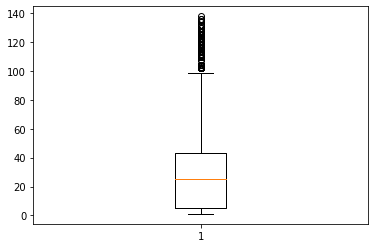

In [129]:
plt.boxplot(testdata["Product_Category_Reference"])
plt.show()

For Size Column

In [130]:
print(testdata['Size'].quantile(0.10))
print(testdata['Size'].quantile(0.90))

37.0
46.0


In [131]:
testdata["Size"] = np.where(testdata["Size"] <37.0, 37.0,testdata['Size'])
testdata["Size"] = np.where(testdata["Size"] >46.0, 46.0,testdata['Size'])

For Cost column

In [132]:
print(testdata['Cost_to_Customer(USD)'].quantile(0.10))
print(testdata['Cost_to_Customer(USD)'].quantile(0.90))

19.0
129.0


In [133]:
testdata["Cost_to_Customer(USD)"] = np.where(testdata["Cost_to_Customer(USD)"] < 19.9, 19.9,testdata['Cost_to_Customer(USD)'])
testdata["Cost_to_Customer(USD)"] = np.where(testdata["Cost_to_Customer(USD)"] > 134.9, 134.9,testdata['Cost_to_Customer(USD)'])

##For Product_Category_Reference column

In [134]:
print(testdata['Product_Category_Reference'].quantile(0.10))
print(testdata['Product_Category_Reference'].quantile(0.90))

3.0
69.0


In [135]:
testdata["Product_Category_Reference"] = np.where(testdata["Product_Category_Reference"] < 3.0, 3.0,testdata['Product_Category_Reference'])
testdata["Product_Category_Reference"] = np.where(testdata["Product_Category_Reference"] > 69.0, 69.0,testdata['Product_Category_Reference'])

In [136]:
testdata.shape

(25000, 20)

In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [138]:
testdata[testdata.select_dtypes(include=['object']).columns]=testdata[testdata.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [139]:
testdata.head()

,Order_Ref_Number,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Gender,Customer_Location,order_placed_day,order_placed_month,order_placed_year,order_delivered_day,order_delivered_month,order_delivered_year,customer_j_day,customer_j_month,customer_j_year,customer_B_day,customer_B_month,customer_B_year
0,75722,1745,37.000,19,64.000,75.000,1,1,20,8,2016,23,8,2016,21,8,2016,31.000,1.000,1975.000
1,80185,1806,42.000,17,69.000,19.900,1,1,24,8,2016,28,8,2016,17,2,2015,10.000,12.000,1969.000
2,19865,22,42.000,45,14.000,19.900,1,15,30,6,2016,2,8,2016,17,2,2015,18.000,1.000,1968.000
3,76700,1683,42.000,19,69.000,39.000,1,6,21,8,2016,24,8,2016,3,3,2016,31.000,3.000,1961.000
4,92992,1500,42.000,64,11.000,69.000,1,0,4,9,2016,6,9,2016,23,4,2016,2.000,6.000,1962.000


In [140]:
testdata1 = testdata.copy()

In [141]:
testdata = testdata.drop(["Order_Ref_Number","Product_Ref_ID"],axis=1)

In [142]:
#testdata = testdata.drop(["Order_Ref_Number","Product_Ref_ID"],axis=1)

In [143]:
testdata.shape

(25000, 18)

In [466]:
pred_test = model4.predict(testdata)

In [467]:
pred_test= pd.DataFrame({"Order_Ref_Number":testdata1.Order_Ref_Number,"Order_Repeat_Chance":pred_test})

In [468]:
print(pred_test)

       Order_Ref_Number  Order_Repeat_Chance
0                 75722                    0
1                 80185                    0
2                 19865                    0
3                 76700                    0
4                 92992                    1
...                 ...                  ...
24995             21272                    0
24996             34015                    1
24997             81356                    1
24998             65721                    0
24999             11628                    1

[25000 rows x 2 columns]


In [469]:
pred_test.to_csv("/content/drive/MyDrive/Scratch Data/fashion12_out_file.csv",index = False)